# Modeling

SmallDS

In [347]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import numpy as np
warnings.simplefilter(action='ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [348]:
def plot_residuals(y_test, y_pred):
  indexes = list(range(1, len(y_pred)+1))[:150]
  fig, axs = plt.subplots(1, 1, figsize=(20, 6), sharey=True)
  axs.plot(indexes, y_pred[:150], label='predicted_value', color='purple')
  axs.plot(indexes, y_test[:150], label='actual_value', color='orange')
  axs.legend()
  axs.set_ylabel('Price')
  fig.suptitle('Predicted Price VS Actual Price')
  plt.show()


Read data from Test and Train csv file

In [349]:
data_train = pd.read_csv('train_data.csv')
data_test = pd.read_csv('test_data.csv')

data_train.head()

,area,room,toilet,price-VND,loai_bds-code,lat,long
0,125,0,0,15500000000,9,16.07790,108.21025
1,40,2,2,1750000000,15,16.07320,108.21208
2,140,4,3,13500000000,16,16.08140,108.21690
3,82,2,2,4218000000,0,16.03851,108.24755
4,167,0,0,22000000000,9,16.04978,108.24067


Chia train/validation/test

In [350]:


X = data_train.drop('price-VND', axis=1)
Y = data_train['price-VND']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)


x_train


,area,room,toilet,loai_bds-code,lat,long
1581,124,0,0,16,16.01407,108.19471
1129,100,2,1,16,16.08346,108.23580
596,150,0,0,7,16.05192,108.16724
2164,147,0,0,9,16.01270,108.18943
758,100,3,3,16,38.89037,-77.03196
...,...,...,...,...,...,...
1033,60,2,1,1,15.99582,108.26936
3264,60,3,3,15,16.07687,108.22035
1653,65,3,3,15,16.07687,108.22035
2607,40,2,2,15,16.08701,108.21539


In [351]:
x_test

,area,room,toilet,loai_bds-code,lat,long
42,62,1,1,0,16.03851,108.24755
3394,68,2,2,0,16.10610,108.13558
1621,85,0,0,9,15.97666,108.23353
2230,90,7,7,16,16.02982,108.22054
2420,40,1,1,0,16.05461,108.24057
...,...,...,...,...,...,...
1242,63,2,2,15,16.03328,108.22257
244,56,3,4,15,16.05116,108.21258
835,76,0,0,16,16.05508,108.22148
1276,80,3,2,15,16.06540,108.18127


# Tạo và lập mô hình bằng Linear Regression

In [352]:
lrg = LinearRegression()
lrg.fit(x_train, y_train)


LinearRegression()

In [353]:
y_pred = lrg.predict(x_test)

Kiểm tra trực quan và dự đoán kết quả

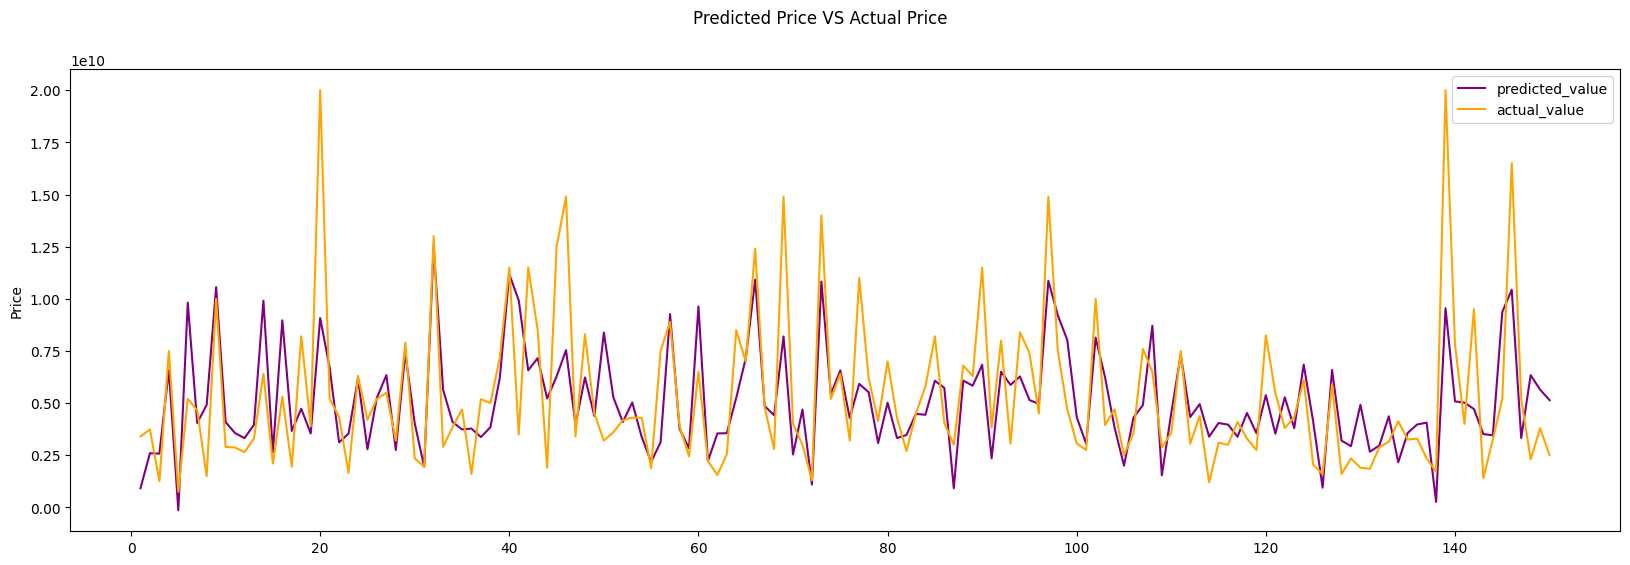

In [354]:
plot_residuals(y_test, y_pred)

Đánh giá mô hình Linear Regression

In [355]:
def accuracy_score(y_test, y_pred, algorithm):
  # r2_score
  R2 = r2_score(y_test, y_pred)
  # RMSE
  rmse = mean_squared_error(y_test, y_pred, squared=False)
  # MAE
  mae = mean_absolute_error(y_test, y_pred)
  # return the results
  print(f'Accuracy score of {algorithm}:\nR2: {R2}\nRMSE: {rmse}\nMAE: {mae}')

In [356]:
accuracy_score(y_test, y_pred, lrg)

Accuracy score of LinearRegression():
R2: 0.40873638354651076
RMSE: 2890221357.596604
MAE: 1987749703.3697178


# Linear Regression với bộ siêu tham số tối ưu

In [357]:
lrg_hyper = LinearRegression()
param_grid = {
    'fit_intercept': [True, False],
    'copy_X': [True, False],
    'n_jobs': [None, -1, 1, 2, 4]
}
lrg_hyper_search = RandomizedSearchCV(lrg_hyper, param_grid, cv=5)
lrg_hyper_search.fit(x_train, y_train)

RandomizedSearchCV(cv=5, estimator=LinearRegression(),
                   param_distributions={'copy_X': [True, False],
                                        'fit_intercept': [True, False],
                                        'n_jobs': [None, -1, 1, 2, 4]})

In [358]:
lrg_hyper_search.best_params_

{'n_jobs': 1, 'fit_intercept': False, 'copy_X': True}

In [359]:
lrg_hyper = lrg_hyper_search.best_estimator_
lrg_hyper.fit(x_train, y_train)

LinearRegression(fit_intercept=False, n_jobs=1)

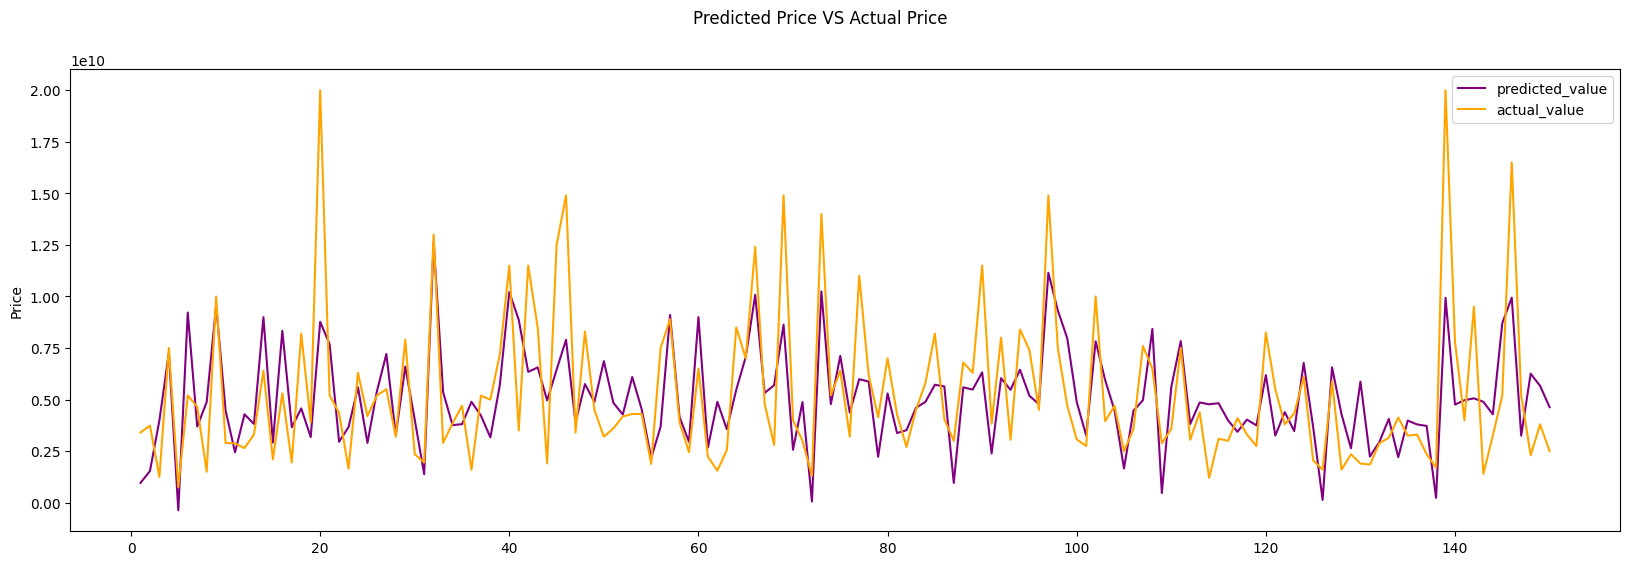

In [360]:
y_pred_linear_hyper = lrg_hyper.predict(x_test)
plot_residuals(y_test, y_pred_linear_hyper)


In [361]:
accuracy_score(y_test, y_pred_linear_hyper, lrg_hyper)

Accuracy score of LinearRegression(fit_intercept=False, n_jobs=1):
R2: 0.3923297132864555
RMSE: 2930046609.0122943
MAE: 2020656220.8445797


# Tạo và lập mô hình bằng Logistic Regression

In [362]:
regression = LogisticRegression()
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2']
}
random_cv = RandomizedSearchCV(regression, param_grid, cv=5)
random_cv.fit(x_train, y_train)

RandomizedSearchCV(cv=5, estimator=LogisticRegression(),
                   param_distributions={'C': [0.01, 0.1, 1, 10, 100],
                                        'penalty': ['l1', 'l2']})

Bộ siêu tham số tối ưu

In [363]:
random_cv.best_params_


{'penalty': 'l2', 'C': 100}

In [364]:
regression.fit(x_train,y_train)


LogisticRegression()

In [365]:
y_pred_log = regression.predict(x_test)

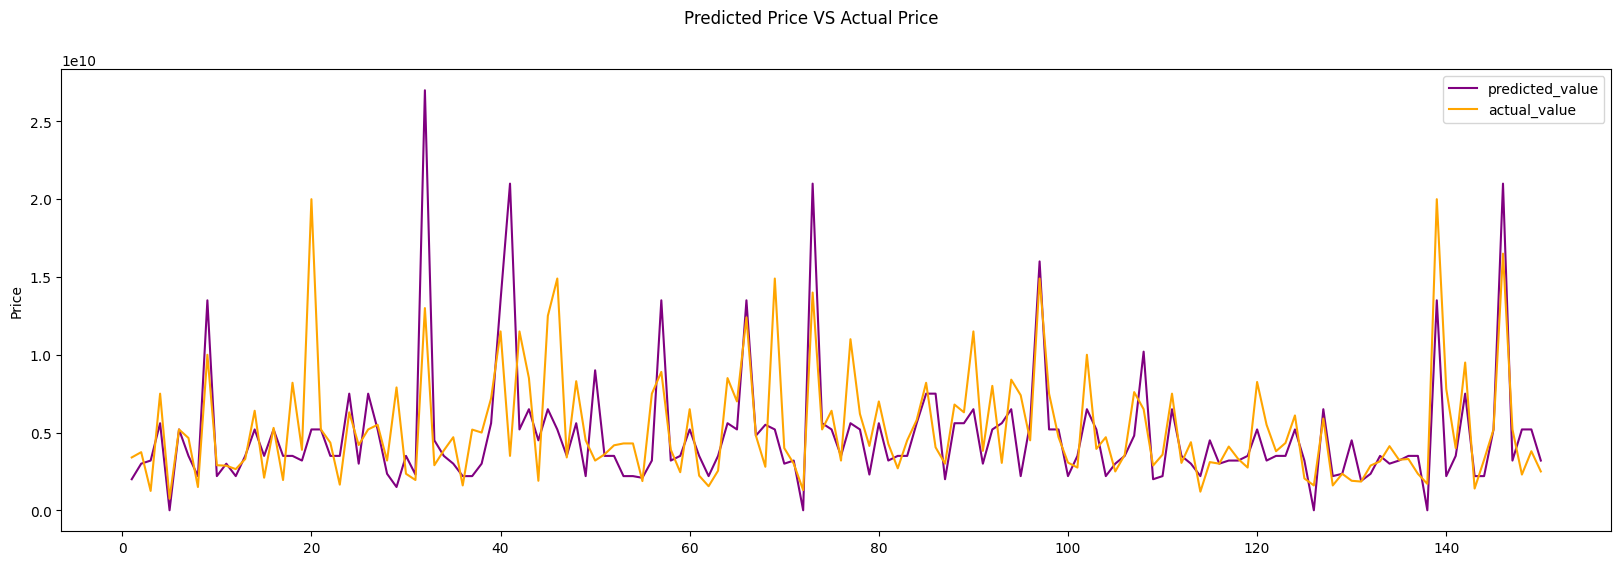

In [366]:
plot_residuals(y_test, y_pred_log)


In [367]:
accuracy_score(y_test, y_pred_log, regression)

Accuracy score of LogisticRegression():
R2: 0.9337025957910571
RMSE: 967807070.2961003
MAE: 2313560919.797688


In [368]:

log_hyper = random_cv.best_estimator_
log_hyper.fit(x_train, y_train)

LogisticRegression(C=100)

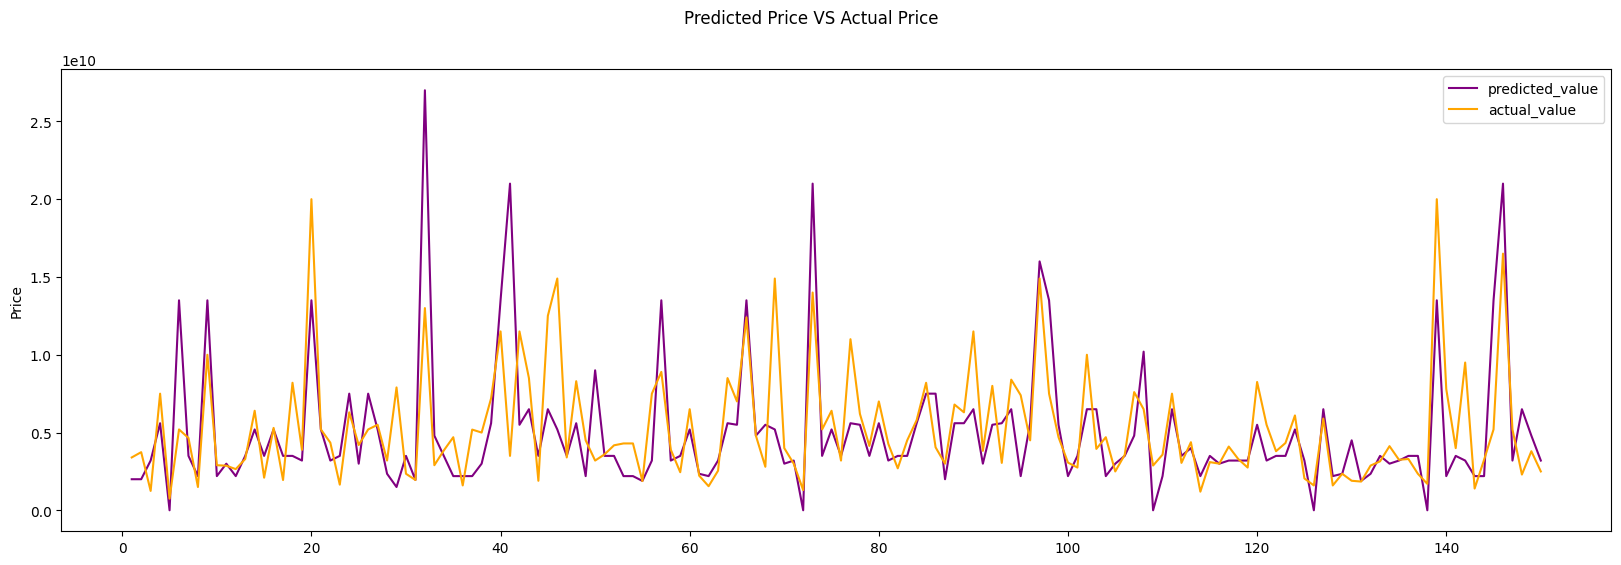

In [369]:
y_pred_log_hyper = log_hyper.predict(x_test)
plot_residuals(y_test, y_pred_log_hyper)

In [370]:
accuracy_score(y_test, y_pred_log_hyper, log_hyper)

Accuracy score of LogisticRegression(C=100):
R2: 0.936157048869532
RMSE: 949723108.4136461
MAE: 2308672191.4739885


So sánh Logistic Regression sử dụng siêu tham số với không sử dụng

In [371]:
results = pd.DataFrame(columns=['Algorithm', 'R2', 'RMSE', 'MAE'])
results.loc[0] = ['Logistic Regression', R2_log, rmse_log, mae_log]
results.loc[1] = ['Logistic Regression with Hyper parameter', R2_log_hyper, rmse_log_hyper, mae_log_hyper]
results.head()

,Algorithm,R2,RMSE,MAE
0,Logistic Regression,0.926705,1.017602e+09,2.301535e+09
1,Logistic Regression with Hyper parameter,0.932060,9.797239e+08,2.345846e+09


So sánh Logistic Regression với Linear Regression

In [372]:
results = pd.DataFrame(columns=['Algorithm', 'R2', 'RMSE', 'MAE'])
results.loc[0] = ['Linear Regression', R2_linear, rmse_linear, mae_linear]
results.loc[1] = ['Logistic Regression with Hyper parameter', R2_log_hyper, rmse_log_hyper, mae_log_hyper]
results.head()

,Algorithm,R2,RMSE,MAE
0,Linear Regression,0.408618,2.890510e+09,1.988569e+09
1,Logistic Regression with Hyper parameter,0.932060,9.797239e+08,2.345846e+09


So sánh Logistic Regression với Linear Regression với bộ siêu tham số

In [373]:
results = pd.DataFrame(columns=['Algorithm', 'R2', 'RMSE', 'MAE'])
results.loc[0] = ['Linear Regression with Hyper parameter', R2_linear_hyper, rmse_linear_hyper, mae_linear_hyper]
results.loc[1] = ['Logistic Regression with Hyper parameter', R2_log_hyper, rmse_log_hyper, mae_log_hyper]
results.head()

,Algorithm,R2,RMSE,MAE
0,Linear Regression with Hyper parameter,0.392617,2.929353e+09,2.024375e+09
1,Logistic Regression with Hyper parameter,0.932060,9.797239e+08,2.345846e+09


kiểm tra lại với test data

In [374]:
x_val= data_test.drop('price-VND', axis=1)
y_val= data_test['price-VND']


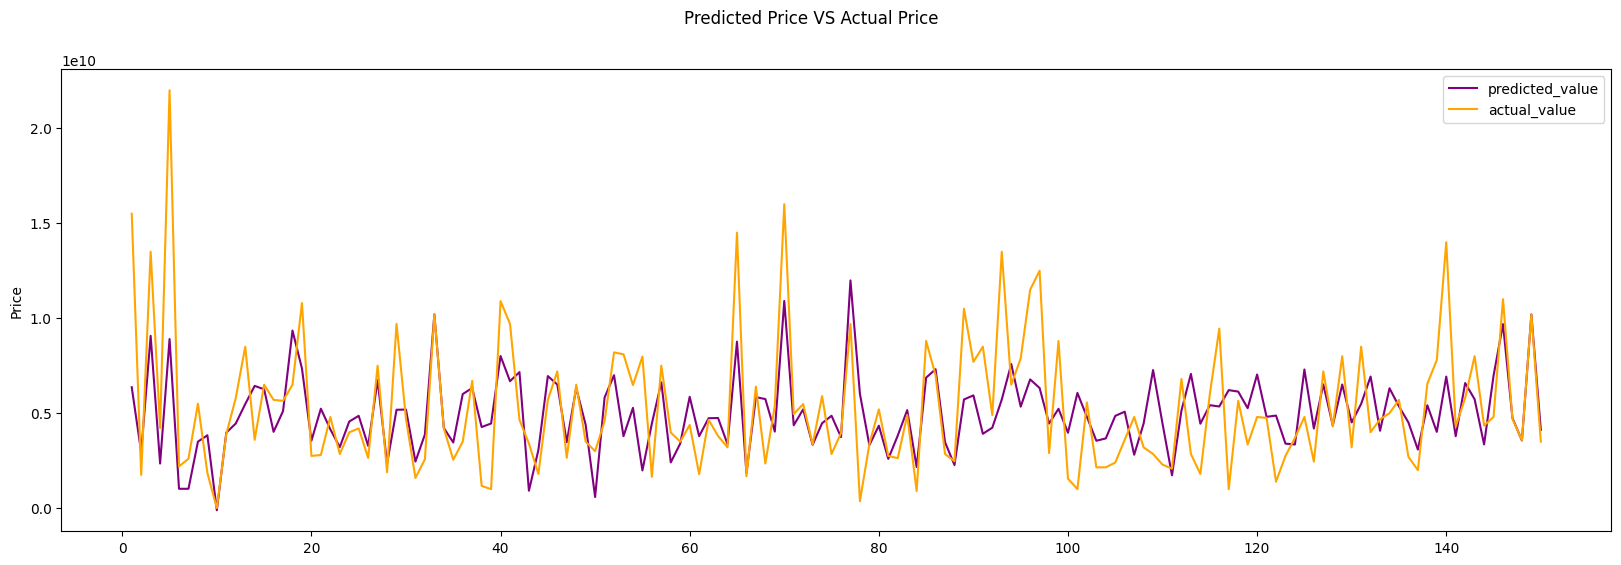

Accuracy score of LinearRegression(fit_intercept=False, n_jobs=1):
R2: 0.37573175887783006
RMSE: 2993972899.777566
MAE: 2100191321.0084095


In [375]:
lrg_hyper.fit(x_val, y_val)
y_pred_linear_hyper = lrg_hyper.predict(x_val)
plot_residuals(y_val, y_pred_linear_hyper)
accuracy_score(y_val, y_pred_linear_hyper, lrg_hyper)


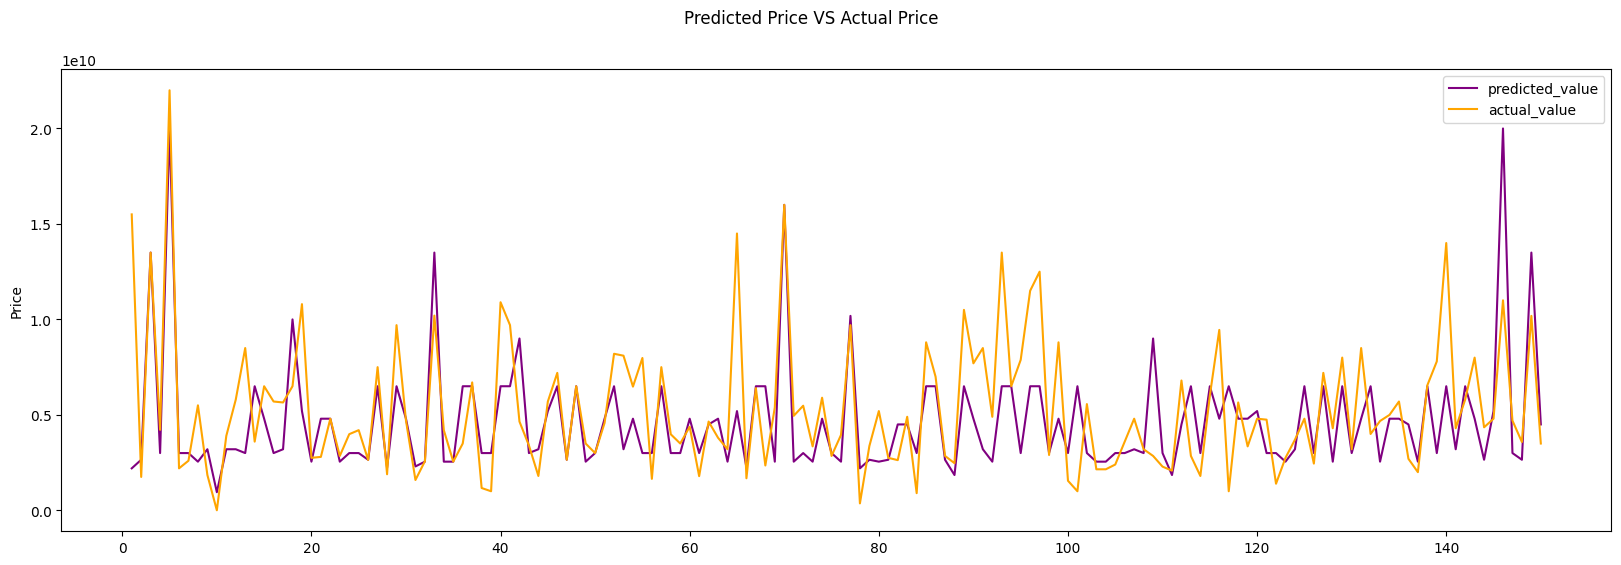

Accuracy score of LogisticRegression(C=100):
R2: 0.9224705336502231
RMSE: 1055104904.1314707
MAE: 2360544248.9158716


In [376]:
log_hyper.fit(x_val, y_val)
y_pred_log_hyper = log_hyper.predict(x_val)
plot_residuals(y_val, y_pred_log_hyper)
accuracy_score(y_val, y_pred_log_hyper, log_hyper)